In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn import metrics
import mglearn
import math

# matplotlit and seaborn for visualizations
import matplotlib.pyplot as plt
# plt.rcParams['font.size'] = 22
import seaborn as sns

# Suppress warnings from pandas
import warnings
warnings.filterwarnings('ignore')

# utilities
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
sns.set_style("darkgrid")
# memory management
import gc

In [2]:
import os
# 운영체제별 한글 폰트 설정
if os.name == 'posix': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif os.name == 'nt': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

## Load Data

In [3]:
data = pd.read_csv("dataset2.csv")

In [4]:
data.columns

Index(['성별코드', '연령대코드(5세단위)', '신장(5Cm단위)', '체중(5Kg단위)', '허리둘레', '시력(좌)',
       '시력(우)', '청력(좌)', '청력(우)', '수축기혈압', '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤',
       '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '요단백', '혈청크레아티닌',
       '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태', '음주여부', '당뇨여부', 'BMI'],
      dtype='object')

In [203]:
X = data[['허리둘레','연령대코드(5세단위)','감마지티피','트리글리세라이드','LDL콜레스테롤','수축기혈압','이완기혈압','(혈청지오티)AST','요단백', '(혈청지오티)ALT','BMI']]

In [204]:
y = data[['당뇨여부']]

## UnderSampling

In [205]:
from imblearn.under_sampling import RandomUnderSampler

def under_sampling(X,y,rating):
    rus = RandomUnderSampler(sampling_strategy=rating, random_state=42)
    x_rus, y_rus = rus.fit_resample(X,y)
    return x_rus, y_rus

In [206]:
x_rus, y_rus = under_sampling(X,y,0.8) 

<AxesSubplot:xlabel='당뇨여부', ylabel='count'>

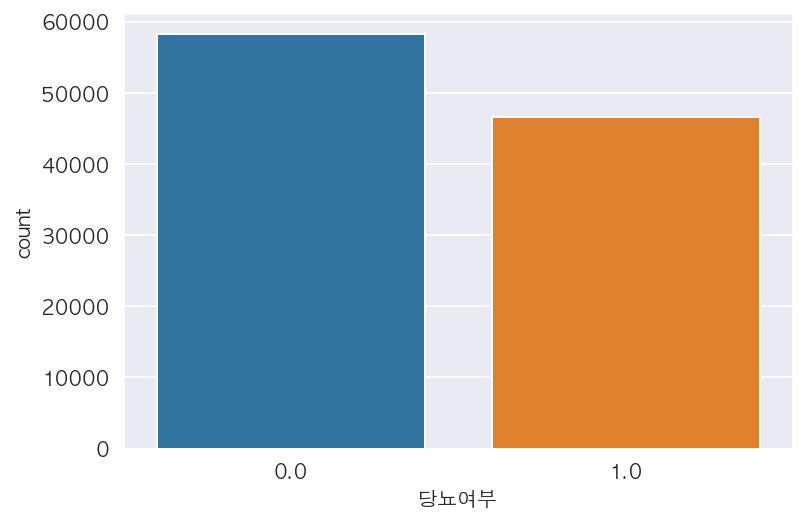

In [207]:
sns.countplot('당뇨여부',data=y_rus)

In [208]:
X_train, X_test, y_train, y_test = train_test_split(x_rus, y_rus,stratify=y_rus, test_size=0.2, random_state=42)

## LinearSVC

In [209]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [210]:
def linearSVC(X,y,scalar=False):

    svc0001 = LinearSVC(C=0.001).fit(X,y)
    svc001 = LinearSVC(C=0.01).fit(X,y)
    svc01 = LinearSVC(C=0.1).fit(X,y)
    svc = LinearSVC(C=1).fit(X,y)  
        
    return svc0001, svc001, svc01, svc

In [67]:
def score(models,X_test,y_test):
    score0001 = models[0].score(X_test, y_test)
    score001 = models[1].score(X_test, y_test)
    score01 = models[2].score(X_test, y_test)
    score = models[3].score(X_test, y_test)
    
    
    return score0001, score001, score01, score

In [68]:
def show_coef(models):
    plt.figure(figsize=(7,5))
    plt.plot(models[0].coef_.T, '*',label="C=0.001")
    plt.plot(models[1].coef_.T, 'v',label="C=0.01")
    plt.plot(models[2].coef_.T, 'o',label="C=0.1")
    plt.plot(models[3].coef_.T, '^',label="C=1")

    plt.xticks(range(len(X.columns)),X.columns,rotation=90)
    xlims = plt.xlim()
    plt.hlines(0,xlims[0],xlims[1])
    plt.legend()

In [69]:
def show_score(scores):
    m = "C"
    s = "0001"
    for i in range(4):
        accuracy = scores[i]
        print(m +" = "+ s[i:])
        print("TestSet accuarcy : {:.9f}\n".format(accuracy))
        
    plt.figure(figsize=(7,5))
    plt.plot(scores)

In [70]:
def confusion_matrix(models, X_test,y_test):
    m = "C"
    s = "0001"
    for i, model in enumerate(models):
        y_pred = model.predict(X_test)
        print(m +" = "+ s[i:])
        print(metrics.confusion_matrix(y_test, y_pred),"\n")

In [71]:
def show_roc_curve(models,X_test,y_test):
    fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
    fig.set_facecolor('white') ## 캔버스 색상 설정
    ax = fig.add_subplot()
    m = "C"
    s = "0001"
    for i, model in enumerate(models):
#         y_test_pred_proba = model.predict_proba(X_test)

        y_score = model.decision_function(X_test)
        y_pred = model.predict(X_test)
        fprs,tprs,thresholds = metrics.roc_curve(y_test, y_score)
        ax.plot(fprs,tprs,label= m +" = "+ s[i:])
        
#         print(classification_report(y_test, pred08))
        
#         ax.plot(fprs , tprs, label='ROC')
    ax.plot([0, 1], [0, 1], "r--", label='Random')
    ax.legend()

In [72]:
from sklearn.metrics import classification_report, roc_auc_score
def show_f1_score(models, X_test,y_test):
    m = "C"
    s = "0001"
    for i, model in enumerate(models):
        pred = model.predict(X_test)
        print( m +" = "+ s[i:])
        print(classification_report(y_test, pred))
        print("roc_auc_score : ", roc_auc_score(y_test, pred),"\n\n")

In [211]:
models = linearSVC(X_train, y_train)

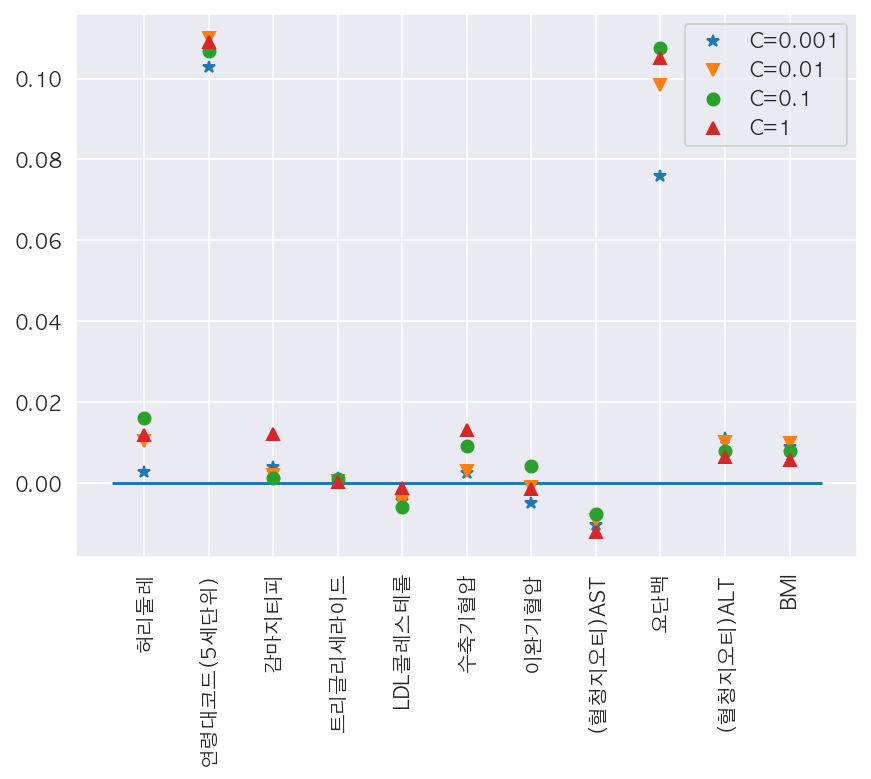

In [212]:
show_coef(models)

C = 0001
TestSet accuarcy : 0.697056438

C = 001
TestSet accuarcy : 0.663470254

C = 01
TestSet accuarcy : 0.502600067

C = 1
TestSet accuarcy : 0.466867039



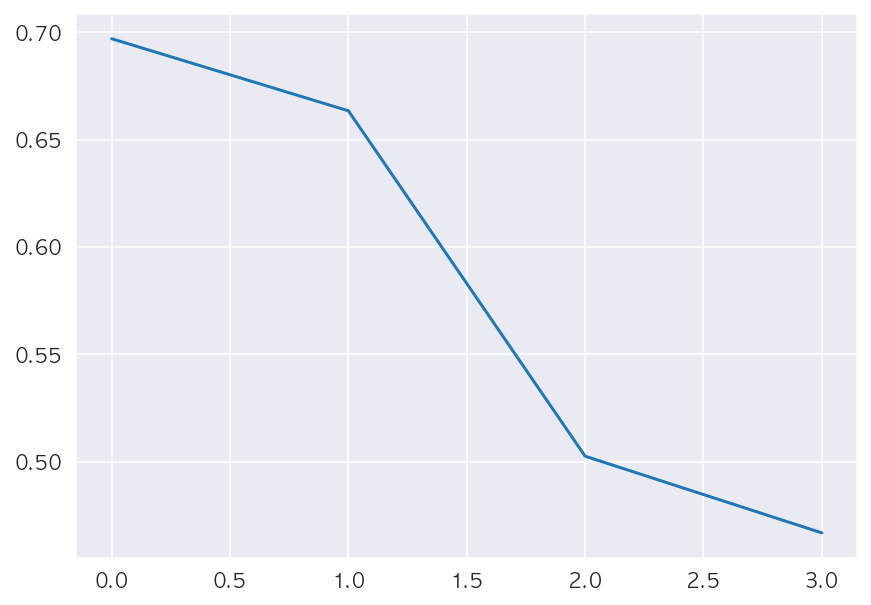

In [213]:
scores = score(models, X_test,y_test)
show_score(scores)

In [214]:
confusion_matrix(models,X_test,y_test)

C = 0001
[[8774 2871]
 [3479 5837]] 

C = 001
[[10227  1418]
 [ 5636  3680]] 

C = 01
[[ 1286 10359]
 [   67  9249]] 

C = 1
[[  481 11164]
 [   11  9305]] 



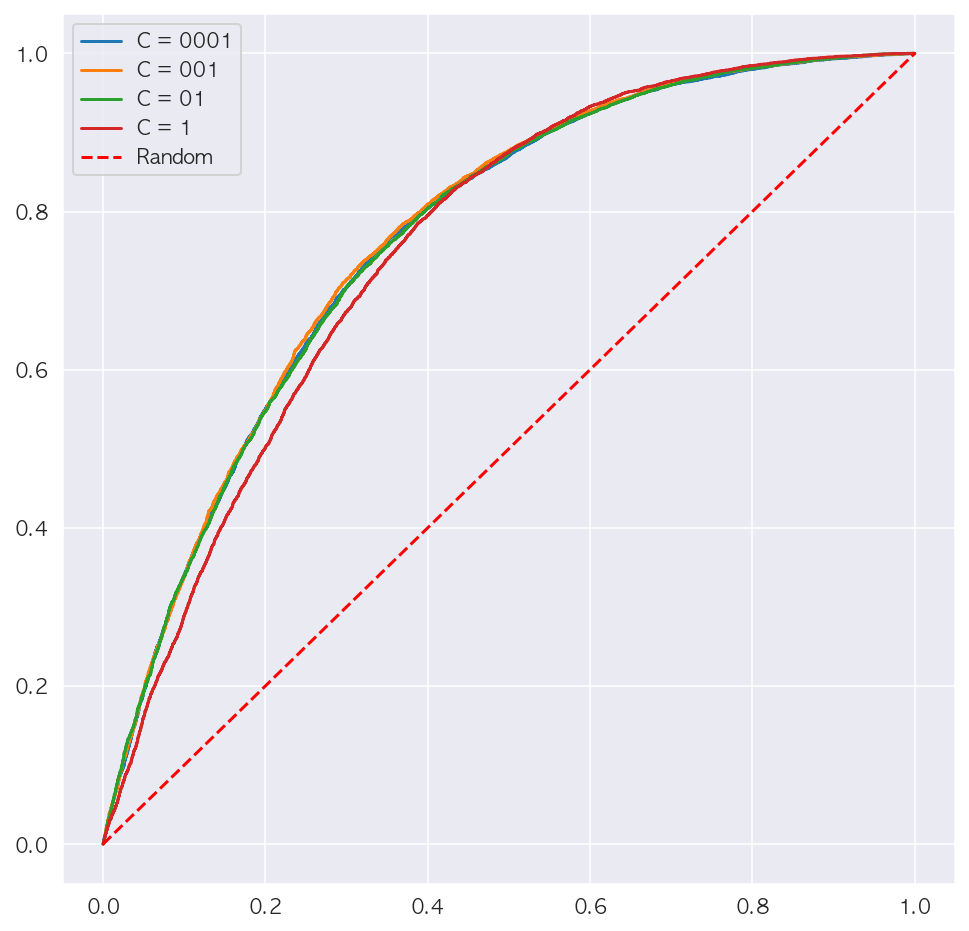

In [215]:
show_roc_curve(models,X_test,y_test)

In [216]:
show_f1_score(models,X_test,y_test)

C = 0001
              precision    recall  f1-score   support

         0.0       0.72      0.75      0.73     11645
         1.0       0.67      0.63      0.65      9316

    accuracy                           0.70     20961
   macro avg       0.69      0.69      0.69     20961
weighted avg       0.70      0.70      0.70     20961

roc_auc_score :  0.6900064405324173 


C = 001
              precision    recall  f1-score   support

         0.0       0.64      0.88      0.74     11645
         1.0       0.72      0.40      0.51      9316

    accuracy                           0.66     20961
   macro avg       0.68      0.64      0.63     20961
weighted avg       0.68      0.66      0.64     20961

roc_auc_score :  0.6366251610133105 


C = 01
              precision    recall  f1-score   support

         0.0       0.95      0.11      0.20     11645
         1.0       0.47      0.99      0.64      9316

    accuracy                           0.50     20961
   macro avg       0.71   

## with Scaler

In [217]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.fit_transform (X_test)

In [218]:
s_models = linearSVC(x_train_scaled, y_train)

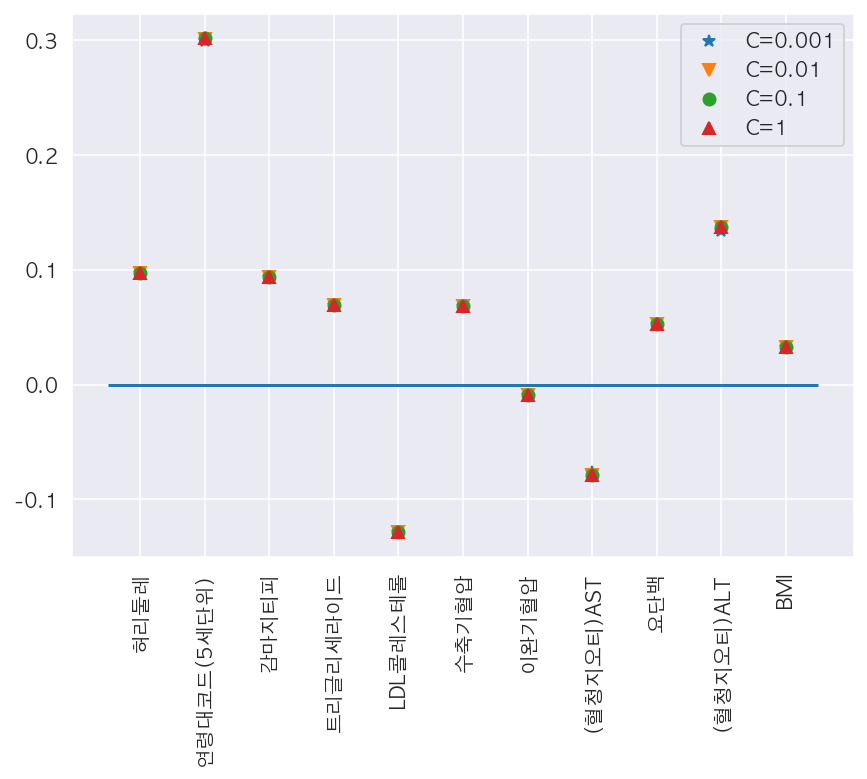

In [219]:
show_coef(s_models)

C = 0001
TestSet accuarcy : 0.701302419

C = 001
TestSet accuarcy : 0.701827203

C = 01
TestSet accuarcy : 0.701874911

C = 1
TestSet accuarcy : 0.701874911



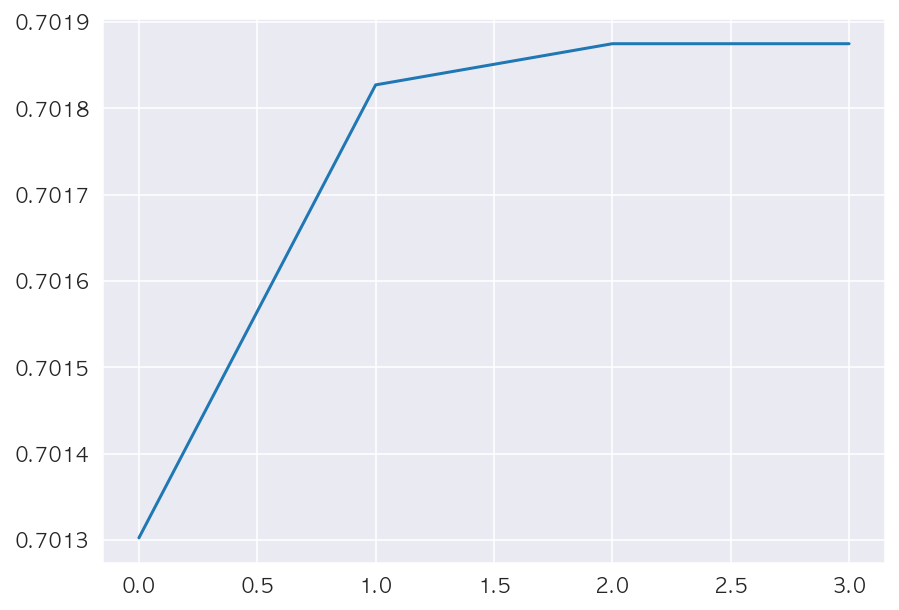

In [220]:
sscores = score(s_models, x_test_scaled,y_test)
show_score(sscores)

In [221]:
confusion_matrix(s_models,x_test_scaled,y_test)

C = 0001
[[8713 2932]
 [3329 5987]] 

C = 001
[[8719 2926]
 [3324 5992]] 

C = 01
[[8718 2927]
 [3322 5994]] 

C = 1
[[8718 2927]
 [3322 5994]] 



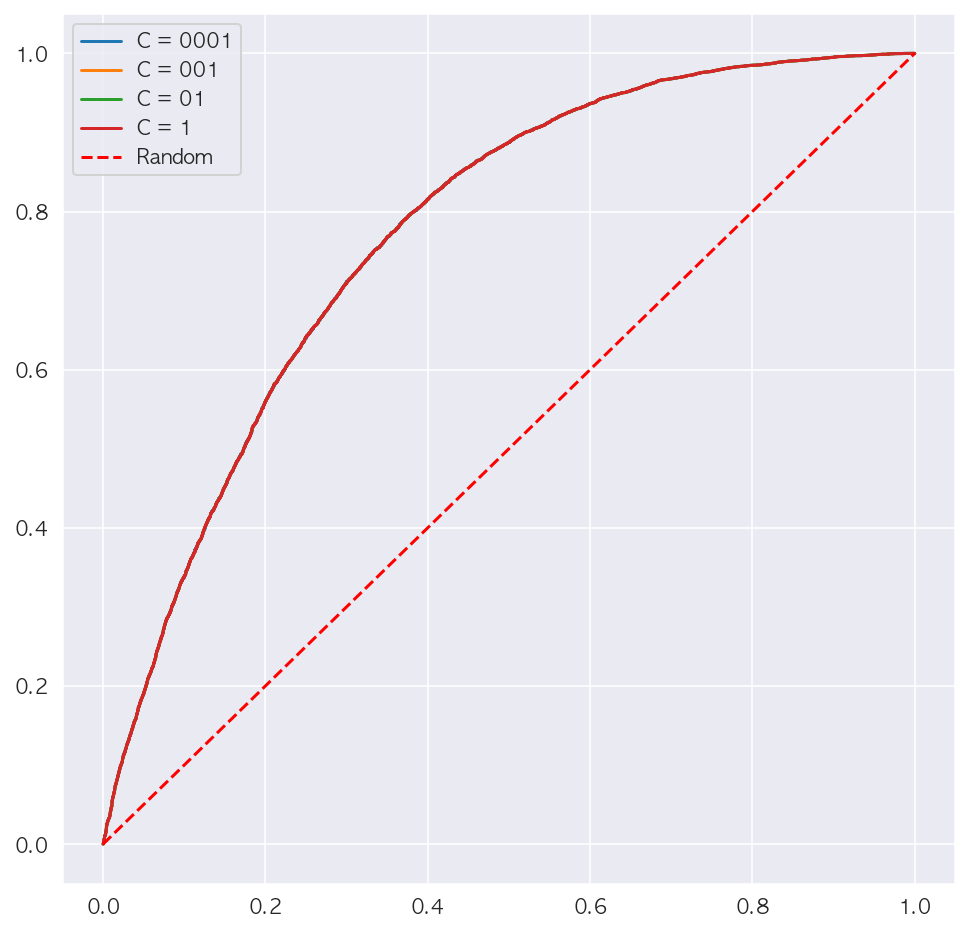

In [222]:
show_roc_curve(s_models,x_test_scaled,y_test)

In [223]:
show_f1_score(s_models,x_test_scaled,y_test)

C = 0001
              precision    recall  f1-score   support

         0.0       0.72      0.75      0.74     11645
         1.0       0.67      0.64      0.66      9316

    accuracy                           0.70     20961
   macro avg       0.70      0.70      0.70     20961
weighted avg       0.70      0.70      0.70     20961

roc_auc_score :  0.6954379562043795 


C = 001
              precision    recall  f1-score   support

         0.0       0.72      0.75      0.74     11645
         1.0       0.67      0.64      0.66      9316

    accuracy                           0.70     20961
   macro avg       0.70      0.70      0.70     20961
weighted avg       0.70      0.70      0.70     20961

roc_auc_score :  0.6959639330184629 


C = 01
              precision    recall  f1-score   support

         0.0       0.72      0.75      0.74     11645
         1.0       0.67      0.64      0.66      9316

    accuracy                           0.70     20961
   macro avg       0.70   

<AxesSubplot:>

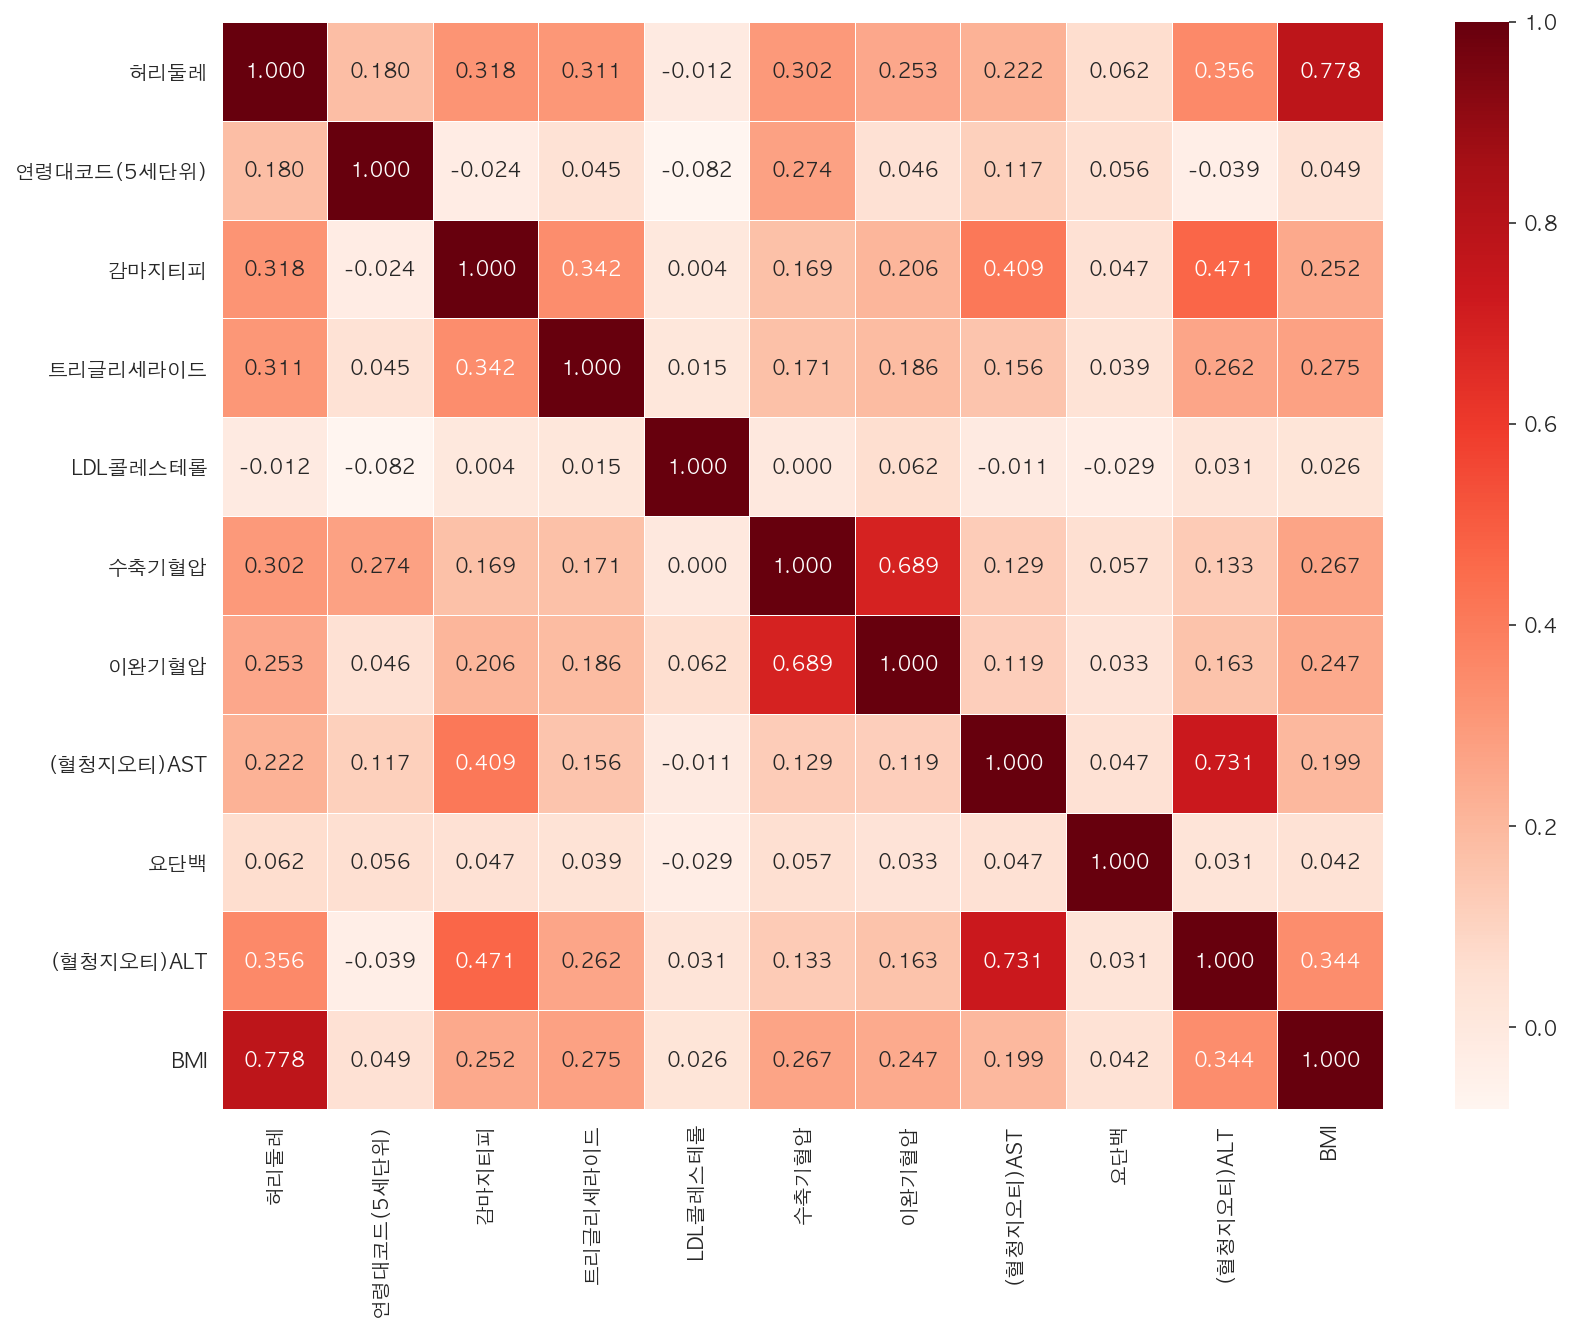

In [233]:
plt.figure(figsize=(13,10))
sns.heatmap(data = X_train.corr(), annot=True, 
fmt = '.3f', linewidths=.5, cmap='Reds')

수축기 - 이완기   
AST - ALT   
BMI - 허리둘레   
   
감마지티피 - ALT & AST -> 이게 상관관계가 높다고 봐야되나..?

## feature 변경

In [289]:
X = data[['허리둘레','연령대코드(5세단위)','트리글리세라이드','LDL콜레스테롤','수축기혈압','(혈청지오티)AST', '(혈청지오티)ALT']]

In [290]:
y = data[['당뇨여부']]

In [291]:
x_rus, y_rus = under_sampling(X,y,0.8) 

In [292]:
X_train, X_test, y_train, y_test = train_test_split(x_rus, y_rus,stratify=y_rus, test_size=0.2, random_state=42)

In [293]:
models = linearSVC(X_train, y_train)

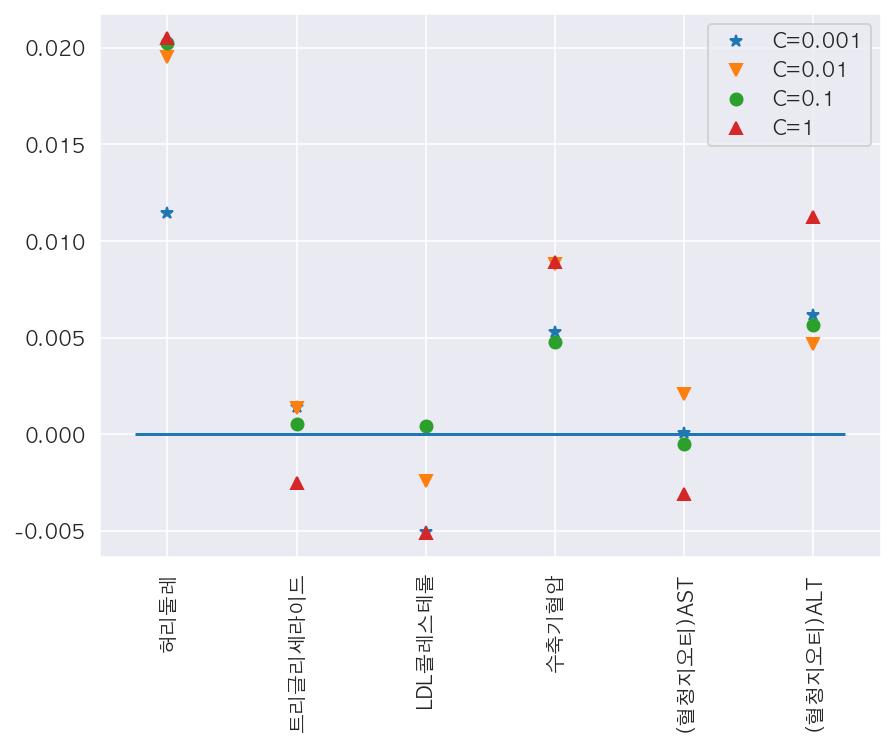

In [294]:
show_coef(models)

C = 0001
TestSet accuarcy : 0.656409522

C = 001
TestSet accuarcy : 0.620628787

C = 01
TestSet accuarcy : 0.578168980

C = 1
TestSet accuarcy : 0.563141072



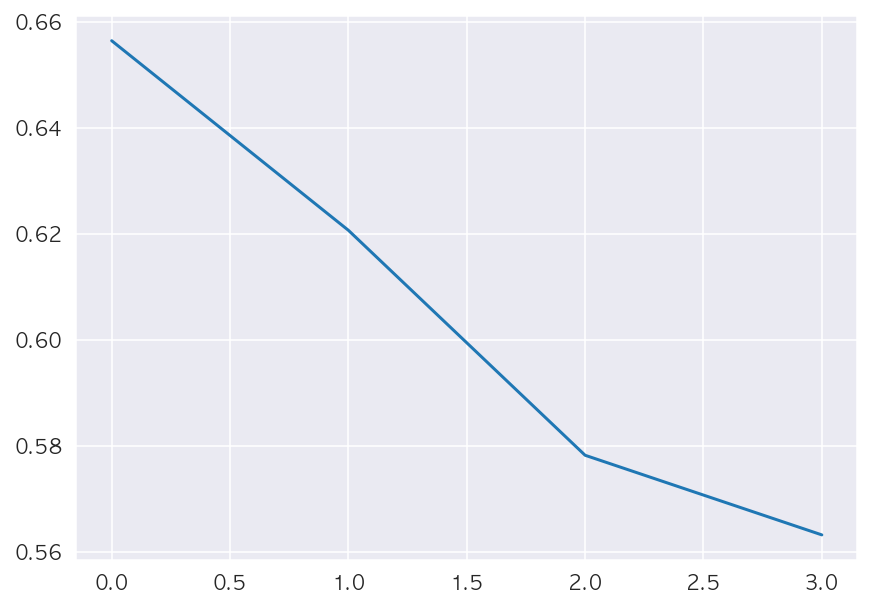

In [295]:
scores = score(models, X_test,y_test)
show_score(scores)

In [296]:
confusion_matrix(models,X_test,y_test)

C = 0001
[[8923 2722]
 [4480 4836]] 

C = 001
[[5122 6523]
 [1429 7887]] 

C = 01
[[11087   558]
 [ 8284  1032]] 

C = 1
[[11552    93]
 [ 9064   252]] 



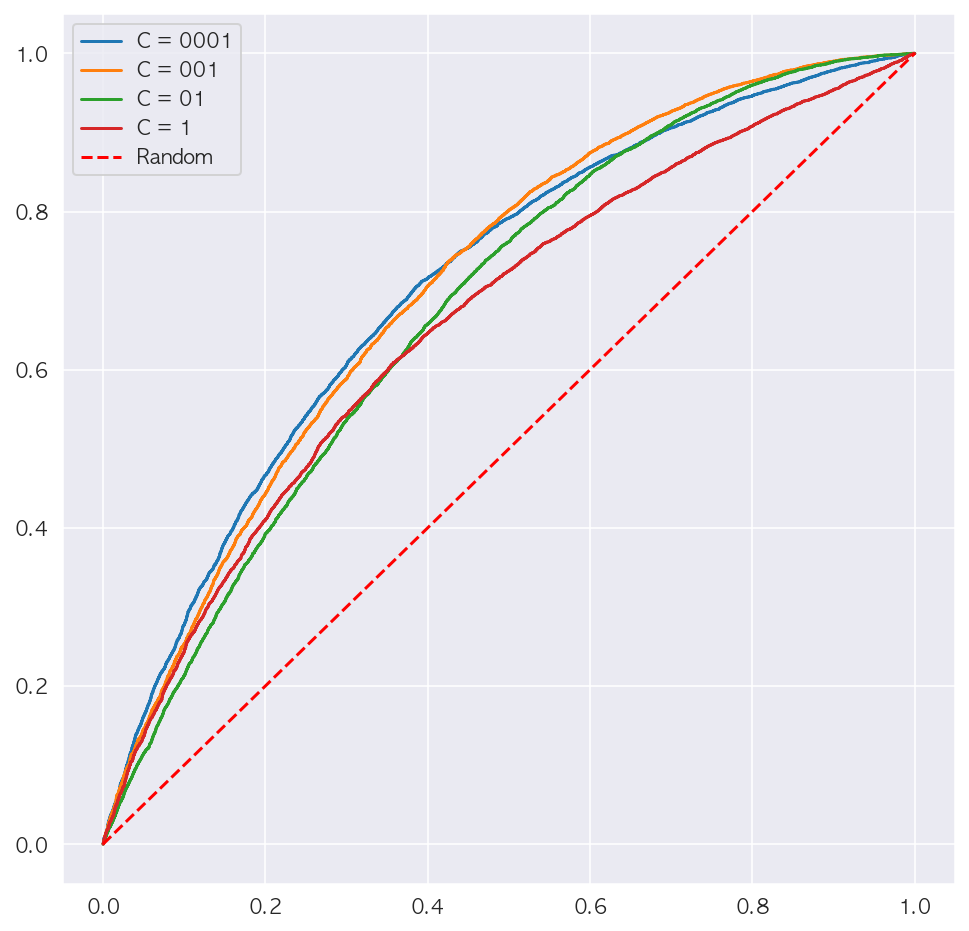

In [297]:
show_roc_curve(models,X_test,y_test)

In [298]:
show_f1_score(models,X_test,y_test)

C = 0001
              precision    recall  f1-score   support

         0.0       0.67      0.77      0.71     11645
         1.0       0.64      0.52      0.57      9316

    accuracy                           0.66     20961
   macro avg       0.65      0.64      0.64     20961
weighted avg       0.65      0.66      0.65     20961

roc_auc_score :  0.6426792614856162 


C = 001
              precision    recall  f1-score   support

         0.0       0.78      0.44      0.56     11645
         1.0       0.55      0.85      0.66      9316

    accuracy                           0.62     20961
   macro avg       0.66      0.64      0.61     20961
weighted avg       0.68      0.62      0.61     20961

roc_auc_score :  0.6432267067410906 


C = 01
              precision    recall  f1-score   support

         0.0       0.57      0.95      0.71     11645
         1.0       0.65      0.11      0.19      9316

    accuracy                           0.58     20961
   macro avg       0.61   

## with Scaler

In [299]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.fit_transform (X_test)

In [300]:
s_models = linearSVC(x_train_scaled, y_train)

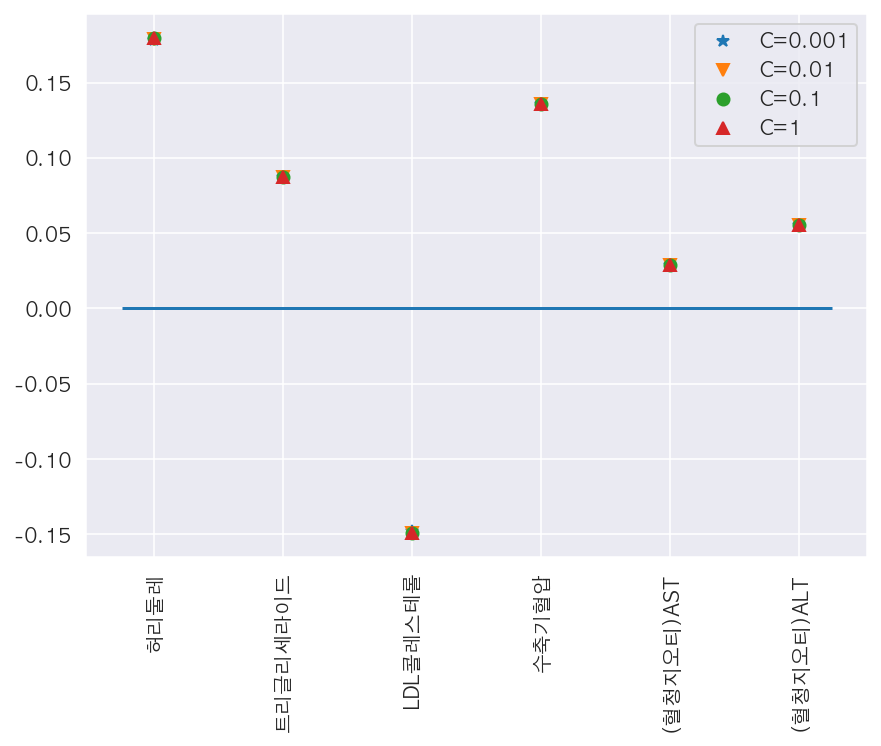

In [301]:
show_coef(s_models)

C = 0001
TestSet accuarcy : 0.657220552

C = 001
TestSet accuarcy : 0.657172845

C = 01
TestSet accuarcy : 0.657172845

C = 1
TestSet accuarcy : 0.657172845



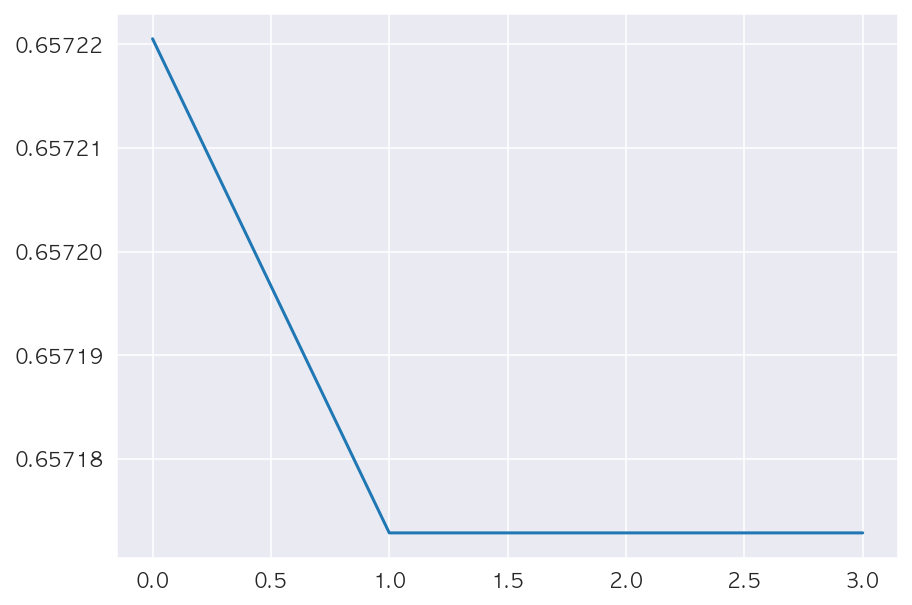

In [302]:
sscores = score(s_models, x_test_scaled,y_test)
show_score(sscores)

In [303]:
confusion_matrix(s_models,x_test_scaled,y_test)

C = 0001
[[8700 2945]
 [4240 5076]] 

C = 001
[[8700 2945]
 [4241 5075]] 

C = 01
[[8700 2945]
 [4241 5075]] 

C = 1
[[8700 2945]
 [4241 5075]] 



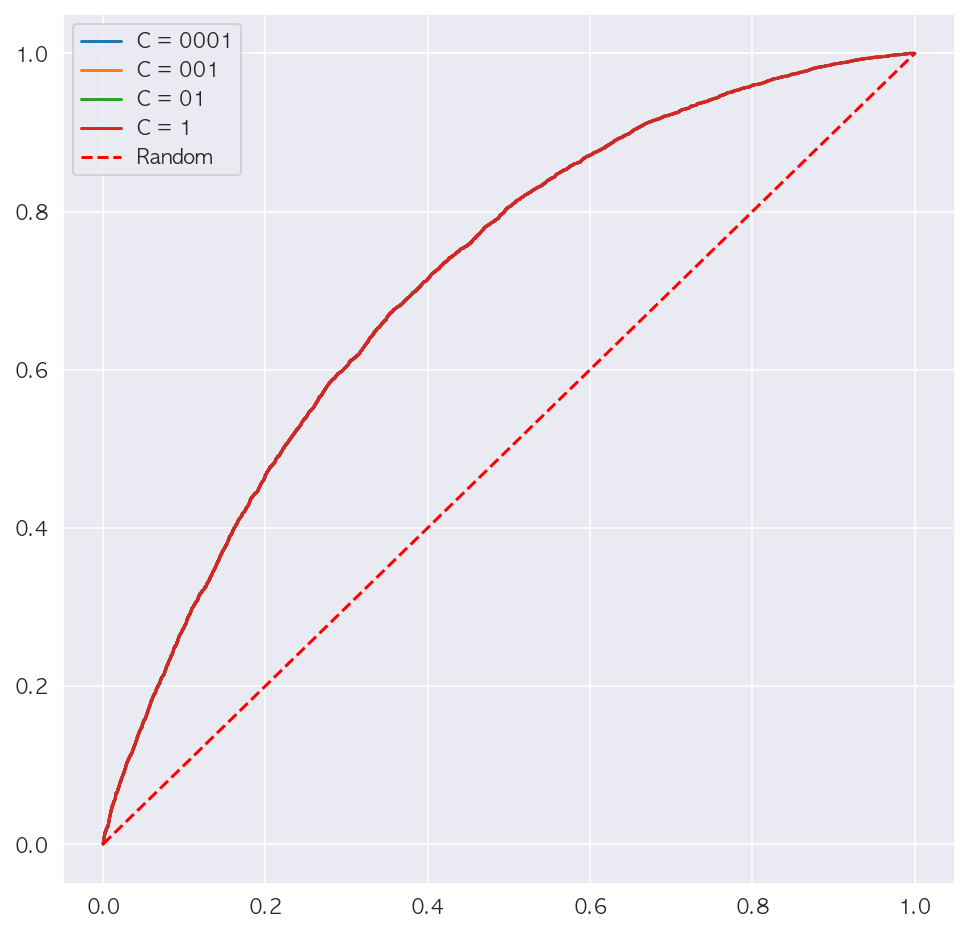

In [304]:
show_roc_curve(s_models,x_test_scaled,y_test)

In [305]:
show_f1_score(s_models,x_test_scaled,y_test)

C = 0001
              precision    recall  f1-score   support

         0.0       0.67      0.75      0.71     11645
         1.0       0.63      0.54      0.59      9316

    accuracy                           0.66     20961
   macro avg       0.65      0.65      0.65     20961
weighted avg       0.65      0.66      0.65     20961

roc_auc_score :  0.6459854014598541 


C = 001
              precision    recall  f1-score   support

         0.0       0.67      0.75      0.71     11645
         1.0       0.63      0.54      0.59      9316

    accuracy                           0.66     20961
   macro avg       0.65      0.65      0.65     20961
weighted avg       0.65      0.66      0.65     20961

roc_auc_score :  0.6459317303563762 


C = 01
              precision    recall  f1-score   support

         0.0       0.67      0.75      0.71     11645
         1.0       0.63      0.54      0.59      9316

    accuracy                           0.66     20961
   macro avg       0.65   

linserSVC에는 predict_proba가 없다..

그래서 coef 기준으로 계수가 높게 나온 특성들 조합해서 찍어봤다.

## 그나마 정확도가 높은 features 조합들..

### X = data[['허리둘레','연령대코드(5세단위)','감마지티피','트리글리세라이드','LDL콜레스테롤','수축기혈압','이완기혈압','(혈청지오티)AST','요단백', '(혈청지오티)ALT','BMI']]

**[C = 0.001, Scaler X]**

accuracy = 0.69 , f1_score : 0.65, roc_auc_score :  0.6895126663804209 

**[Scaler O]** 

accuracy = 0.70 , f1_score : 0.66 , roc_auc_score :  0.6960283383426364



### X =  data[['허리둘레','감마지티피','트리글리세라이드','LDL콜레스테롤','수축기혈압','이완기혈압','(혈청지오티)AST','(혈청지오티)ALT']]

**[C = 0.001, Scaler X]**

accuracy = 0.6635, f1_score = 0.58, roc_auc_score : 0.6505

**[Scaler O]**

accuracy = 0.66, f1_score = 0.59 , roc_auc_score :  0.6490



### X = data[['허리둘레','감마지티피','트리글리세라이드','연령대코드(5세단위)','요단백','수축기혈압','(혈청지오티)ALT']]

**[C = 0.01, Scaler X]**

accuracy = 0.6836, f1_score : 0.69, roc_auc_score : 0.6933018



### X =  data[['허리둘레','감마지티피','트리글리세라이드','수축기혈압','연령대코드(5세단위)','요단백','(혈청지오티)ALT']]

**[C = 0.1, Scaler X]**

accuracy = 0.6784, f1_score : 0.65 , roc_auc_score : 0.6778338

**[C = 0.001, Scaler]**

accuracy = 0.687562, f1_score : 0.64 , roc_auc_score : 0.6818054

### X = data[['허리둘레','연령대코드(5세단위)','트리글리세라이드','LDL콜레스테롤','수축기혈압','(혈청지오티)AST','요단백', '(혈청지오티)ALT','BMI']]

**[C = 0.01, Scaler X]**

accuracy = 0.6943, f1_score : 0.70 , roc_auc_score :  0.70343

### X = data[['허리둘레','연령대코드(5세단위)','감마지티피','수축기혈압','(혈청지오티)ALT','요단백']]

**[C = 0.001, Scaler O]**   

accuarcy : 0.689423, f1_score : 0.64, roc_auc_score :  0.6831

### X = data[['허리둘레','연령대코드(5세단위)','트리글리세라이드','LDL콜레스테롤','수축기혈압','(혈청지오티)AST', '(혈청지오티)ALT']]
**[C = 0.01, Scaler X]**

accuracy =  0.69681, f1_score : 0.70, roc_auc_score :  0.701502

feature 개수를 줄이면 정확도가 떨어진다.. 왜지?